# Course Project: Building a Modeling Data Set

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

import os 

sns.set_theme(style='darkgrid')

In this course project, you will complete the following tasks to <b>build a modeling dataset</b>:

1. <b>Load the "adult" data set</b> and identify the <b>number of rows & columns</b>
2. Build a new regression <b>label column</b> by winsorizing outliers
3. Replace all <b>missing values</b> with means
4. <b>Identify</b> two features with the <b>highest correlation with label</b>
5. Build appropriate <b>bivariate plots</b> between the highest correlated features and label

## Part 1. Load the Data

Use the specified file name to load the data. Save it as a Pandas DataFrame called `df`.

**Task**: Read in the data using the `pd.read_csv()` function and save it to DataFrame `df`. Note: use the variable `filename` in your call to `pd.read_csv()`.

In [2]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "adult.data.full.asst")

In [3]:
# YOUR CODE HERE
df = pd.read_csv(filename)

**Task**: Display the shape of `df` -- that is, the number of rows and columns.

In [4]:
# YOUR CODE HERE
df.shape

(32561, 15)

*Check your work*: while we used a small subset of the `adult` dataset in the exercises, the dataset that we are using now has a substantially greater number of rows, but the same number of columns as before. You should see this reflected when you print out the dimensions of DataFrame `df`.

**Task**: Get a peek of the data by displaying the first few rows, as you usually do.

In [5]:
# YOUR CODE HERE
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [6]:
df.describe(include='all')



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
count,32399.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32236.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.589216,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,615.907773,87.303830,40.450428,NaN,NaN
std,13.647862,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,2420.191974,402.960219,12.353748,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## Part 2. Create a (Winsorized) Label Column

Assume that your goal is to use this dataset to fit a regression model that predicts the number of years  of education that a person has had.

We'd like to create a new version of the `education-num` column, in which we replace the outlier values of `education-num` (on both sides of the range -- the low end as well as the high end). We will replace the outliers with the corresponding percentile value, as we did in the exercises. That is, if we wish to replace any value below, say, the 1.234-th percentile, we shall replace all such (various) values by the exact same value in our data -- the value such that 1.234% of data lies below it.

We will need to import the `stats` module from the `scipy` package:

In [7]:
import scipy.stats as stats

**Task**: Create a new column, titled `label`, by winsorizing the `education-num` column with the top and bottom 1% percentile values.

In [8]:
# YOUR CODE HERE
df['label'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])

Let's verify that a new column got added to the DataFrame:

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,label
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,13
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,13
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,9
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,7
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,13


An interesting thing to think about: take a look at the data and notice that for the first five rows, the values of the `education-num` column and its winsorized version -- `label` -- are the same. Does this mean that winsorization did not work? Or are there discrepancies further down the list of rows, where we cannot see them?

**Task**: Check that the values of `education-num` and `label` are *not* identical. You may do this by subtracting the two columns and then listing the unique values of the result. If you see values other than zero, it means *some* change did happen, as we would expect.

In [10]:
# YOUR CODE HERE
(df['label'] - df['education-num']).unique().tolist()

[0, 1, 2]

## Part 3. Replace the Missing Values With Means

### a. Identifying missingness

**Task**: Check if a given value in any data cell is missing, and sum up the resulting values (`True`/`False`) by columns. Assign the results to variable `nan_count`. Print the results.

In [11]:
# YOUR CODE HERE
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
label                0
dtype: int64


Replacing the missing values with the mean only makes sense for the numerically valued columns (and not for strings). Hence, we will focus on the `age` and `hours-per-week` columns.

### b. Keeping record of the missingness: creating dummy variables 

As a first step, you will now create dummy variables indicating missingness of the values.

**Task**: Store the `True`/`False` series that indicate missingness of any value in `age` as a new column called `age_na`. Store the `True`/`False` series that indicate missingness of every value of `hours-per-week` as a new column called `hours-per-week_na`.

In [12]:
# YOUR CODE HERE
num_rows = df.shape[0]

df['age_na'] = df['age'].isnull()
age_replacements = df['age_na'].sum()
age_replacements_percent = age_replacements / num_rows
print(f'number of rows in AGE column that had NaN that were replaced with the mean: {age_replacements} or {age_replacements_percent * 100}% of all rows')

df['hours-per-week_na'] = df['hours-per-week'].isnull()
hours_replacements = df['hours-per-week_na'].sum()
hours_replacements_percent = hours_replacements / num_rows
print(f'number of rows in HOURS-PER-WEEK column that had NaN that were replaced with the mean: {hours_replacements} or {hours_replacements_percent * 100}% of all rows')

df.head()

number of rows in AGE column that had NaN that were replaced with the mean: 162 or 0.49752771720770245% of all rows
number of rows in HOURS-PER-WEEK column that had NaN that were replaced with the mean: 325 or 0.9981265931636005% of all rows


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,label,age_na,hours-per-week_na
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,13,False,False
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,13,False,False
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,9,False,False
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,7,False,False
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,13,False,False


### c. Replacing the missing values with mean values of the column

**Task**: Fill the missing values of the `age` and `hours-per-week` columns with the mean value of the corresponding column.

In [13]:
# YOUR CODE HERE
mean_ages=df['age'].mean()
mean_hours=df['hours-per-week'].mean()

# fill all missing values with the mean
df['age'].fillna(value=mean_ages, inplace=True)
df['hours-per-week'].fillna(value=mean_hours, inplace=True)



<b>Ungraded Task</b>: Check your results. Display the sum of missing values for the `age` column (or reuse the code for listing total numbers of all missing values that you wrote before, if it worked.

In [14]:
# YOUR CODE HERE - this cell will not be graded
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

age                     0
workclass            1836
fnlwgt                  0
education               0
education-num           0
marital-status          0
occupation           1843
relationship            0
race                    0
sex_selfID              0
capital-gain            0
capital-loss            0
hours-per-week          0
native-country        583
income_binary           0
label                   0
age_na                  0
hours-per-week_na       0
dtype: int64


## Part 4. Identify Features With the Highest Correlation With the Label

Your next goal is to figure out which features in the data correlate most with the label.<br>

In the next few cells, we will demonstrate how to use Pandas `corr()` method to get a list of correlation coefficients between the `label` and all other (numerical) features.  To learn more about the `corr()` method, consult the online [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

Let's first galnce at what the `corr()` method does:

In [15]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,age_na,hours-per-week_na
age,1.000000e+00,-0.076085,0.036685,0.124705,0.057478,6.657191e-02,0.038549,7.101579e-18,-4.325250e-05
fnlwgt,-7.608468e-02,1.000000,-0.043195,-0.002234,-0.010252,-1.804716e-02,-0.042134,-9.015193e-03,-5.769619e-03
education-num,3.668517e-02,-0.043195,1.000000,0.167089,0.079923,1.465533e-01,0.999182,-1.708530e-03,-5.670679e-03
capital-gain,1.247046e-01,-0.002234,0.167089,1.000000,-0.055138,1.009947e-01,0.168202,-5.313515e-03,4.981172e-03
capital-loss,5.747841e-02,-0.010252,0.079923,-0.055138,1.000000,5.420158e-02,0.080453,-7.205893e-03,-1.511760e-03
hours-per-week,6.657191e-02,-0.018047,0.146553,0.100995,0.054202,1.000000e+00,0.147275,2.254277e-03,7.385613e-17
label,3.854869e-02,-0.042134,0.999182,0.168202,0.080453,1.472753e-01,1.000000,-1.955584e-03,-5.811006e-03
age_na,7.101579e-18,-0.009015,-0.001709,-0.005314,-0.007206,2.254277e-03,-0.001956,1.000000e+00,-2.709086e-03
hours-per-week_na,-4.325250e-05,-0.005770,-0.005671,0.004981,-0.001512,7.385613e-17,-0.005811,-2.709086e-03,1.000000e+00


The result is a computed *correlation matrix*. The values on the diagonal are all equal to 1, and the matrix is symmetrical with respect to the diagonal.<br>

We only need to observe correlations of all features with the column `label` (as opposed to every possible pairwise correlation). Se let's query the `label` column of this matrix:

In [16]:
df.corr()['label']

age                  0.038549
fnlwgt              -0.042134
education-num        0.999182
capital-gain         0.168202
capital-loss         0.080453
hours-per-week       0.147275
label                1.000000
age_na              -0.001956
hours-per-week_na   -0.005811
Name: label, dtype: float64

This is good, but contains two values too many: we do not need to observe the correlation of `label` with itself, and moreover we are not interested in the correlation between the label and `education-num` (recall that `label` is a winsorized version of the `education-num`). So we will exclude these two values using the Pandas `drop()` method:

In [17]:
exclude = ['label','education-num']
df.corr()['label'].drop(exclude, axis = 0)

age                  0.038549
fnlwgt              -0.042134
capital-gain         0.168202
capital-loss         0.080453
hours-per-week       0.147275
age_na              -0.001956
hours-per-week_na   -0.005811
Name: label, dtype: float64

**Task**: The code below performs the same operation above, but saves the result to variable `corrs`. Sort the values in `corrs` in descending order. Use the Pandas method `sort_values()`  to accomplish this task. For more information on how to use the `sort_values()` method, consult the online [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html).

In [18]:
# Do not remove or edit the line below:
corrs = df.corr()['label'].drop(exclude, axis = 0)

# YOUR CODE HERE 
# didn't need to specify which column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
corrs_sorted = corrs.sort_values(ascending=False)
print(corrs_sorted)

capital-gain         0.168202
hours-per-week       0.147275
capital-loss         0.080453
age                  0.038549
age_na              -0.001956
hours-per-week_na   -0.005811
fnlwgt              -0.042134
Name: label, dtype: float64


**Task**: Save the *column names* for the top-2 correlation values into a  Python list called `top_two_corr` <br>
_Tip_: `corrs_sorted` is a Pandas `Series` object, in which column names are the *index*. Once you find the column names, use the Python `list()` method to convert the values into a Python `list`.

In [19]:
# YOUR CODE HERE 
top_two_corr = corrs_sorted.index[0:2].tolist()
top_two_corr

['capital-gain', 'hours-per-week']

## Part 5. Produce Bivariate Plots for the Label and Its Top Correlates

We will use the `pairplot()` function in `seaborn` to plot the relationships between the two features we identified and the label.

**Task**: Create a DataFrame named ` df_sub` that contains only these three columns from DataFrame `df`: the label, and the two columns which correlate with it the most. 

*Tip*: You can use the variable `top_two_corrs` in your solution.

In [20]:
# YOUR CODE HERE
# print(top_two_corr)
# the .copy() is needed if you re-run this cell
columns_to_analyze = top_two_corr.copy()
label_column_name = 'label'
columns_to_analyze.append(label_column_name)
# print(columns_to_analyze)

df_sub = df[columns_to_analyze]
df_sub.head(2)

,capital-gain,hours-per-week,label
0,2174,40.0,13
1,0,13.0,13


<b>Task</b>: Create a `seaborn` pairplot of the data subset you just created.

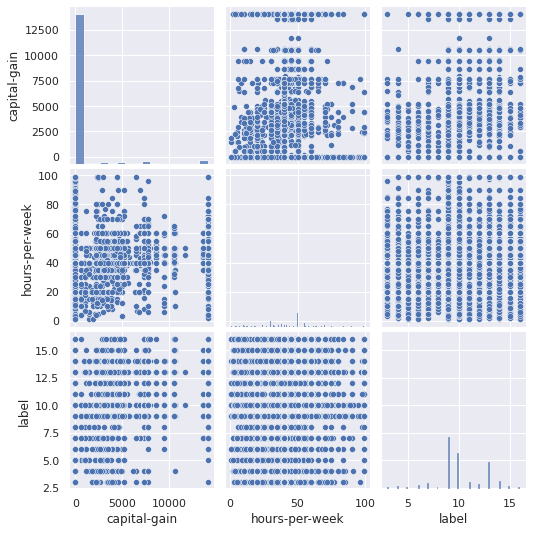

In [21]:
# YOUR CODE HERE
sns.pairplot(data=df_sub)

This one is not very easy to make sense of: the points overlap, but we do not have visibility into how densely they are stacked together.
<br>

<b>Task</b>: Repeat the `pairplot` exercise, this time specifying the *kernel density estimator* as the *kind* of the plot.<br>
*Tip*: Use `kind = 'kde'` as a parameter of the `pairplot()` function. You could also specify `corner=True` to make sure you don't plot redundant (symmetrical) plots.

Note: This will take a while to run and produce a plot.

In [22]:
xxx = df['capital-gain'] > 0
sum(xxx)

2712

Starting KDE plot. This takes a while...
finished!


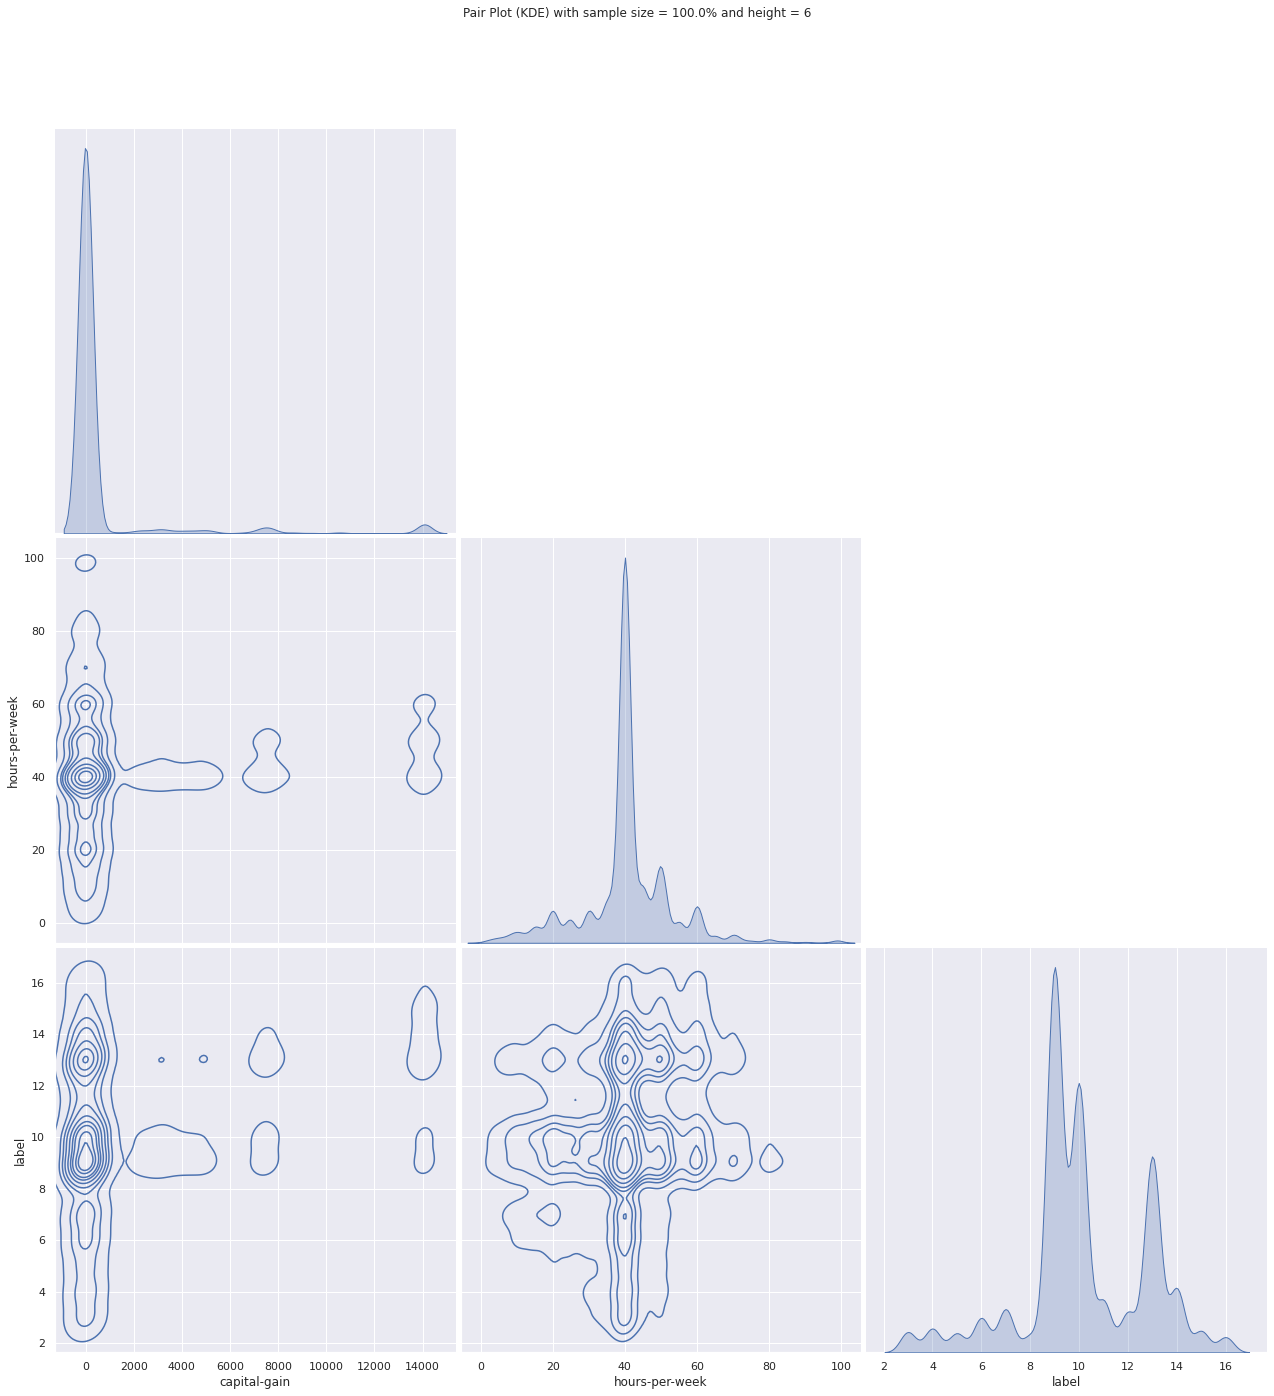

In [23]:
# YOUR CODE HERE
# https://seaborn.pydata.org/generated/seaborn.pairplot.html




print('Starting KDE plot. This takes a while...')
fraction_to_plot = 1.0
height = 6 # unknown units
dpi=300
# 0.01 takes 3   sec
# 0.10 takes 18  sec
# 0.25 takes 43  sec
# 0.30 takes 51  sec
# 0.50 takes 84  sec
# 1.0. takes 170 sec

plot_filename = f'pairplot-{fraction_to_plot}-{height}.svg'
figure_title = f'Pair Plot (KDE) with sample size = {100.0 * fraction_to_plot}% and height = {height}'

pairplotres = sns.pairplot(data=df_sub.sample(frac=fraction_to_plot), height = height, kind = 'kde', corner = True)
pairplotres.fig.suptitle(figure_title, y=1.08)

pairplotres.figure.savefig(plot_filename)


print('finished!')

Think about the possible interpretations of these plots. (Recall that our label encodes `education`, in number of years). <br>
Here is an example of the kind of stories this data seems to be telling. It appears as though hours per week are stacked around the typical 40-hour value, and that this value of weekly hours dominates regardless of the level of education. However, it seems that it is somewhat less typical for people with lower levels of formal education to be working over 65 hours a week. <br>


<b>Analysis</b>: Try to interpret what you see in this plot, as well as the one depicting the relationship between 'capital gain' and the levels of education, and see what kind of patterns you are noticing. Moreover, is there something odd that raises red flags and makes you think the data or our handling of it may be invalid? Is there something that, on the contrary, satisfies your intuition, thereby providing a 'sanity check'? These are the kind of questions that are useful to ask yourself as you are looking at the data distributions and pairwise relationships. Record your findings in the cell below.



# Analyzing the columns individually

I analyzed the adult.data.full.asst data set, which was composed of about 32,500 rows representing individuals. The population of Canada over the age of 25 is 28 million, so this data set represents about 0.12% of Canadian adults.

The histogram plot of capital gains showed that the overwhelming majority were zero or near zero. There were small populations at higher levels, but it’s likely that the raw capital gains underrepresented higher income brackets- almost no rows had CG over \\$6,000 . 

The maximum reported capital loss was about only \\$4,000 and the maximum capital gain was only \\$14,000 . Both of these give me doubts about the raw data since I’m sure someone in Canada had lost more than \\$4,000 in a single year and someone else must have gained more than \\$14k in a year.

The hours per week column was fairly well distributed as a bell curve, which inspired more confidence. 

The education levels histogram implied that the number of college dropouts is ~1.3x the number of college graduates, implying that only 43\% of people who start college finish. This seemed low to me, but I was surprised to find through Googling that this was a higher than average college (35-40\%) graduation rate in Canada.

# Analyzing the correlation between columns

## The education vs capital gain KDE plot
There was a mild correlation of higher education meaning higher capital gains. Education level and capital gain had the highest correlation of all feature combinations in the correlation matrix, about 0.167. This makes me hesitant to use both education level and capital gain for training a model since features should be independent of each other, but I would consult a Subject Matter Expert first. The education vs capital gain KDE plot showed that high school educated people had more consistent (smaller variance) of capital gains compared to the higher ed people who had a larger variance. Completing college gave way to a broader income range, but there were still many college educated people with similar capital gains to high school educated people. 

## The hours per week vs capital gain KDE plot
There was not a strong correlation between working more hours per week and higher capital gains. There were some groups that worked an extreme number of hours per week but still had near zero capital gains. Some full time employees (40 or more hours per week) experienced increased capital gains when working more hours, but certainly not all.


## The education vs hours per week KDE plot
The correlation matrix showed a 0.146 correlation between education level and hours per week. There was a moderate trend that indicated that people with masters or higher education typically worked more than 40 hours per week. I’m guessing that this represents high income high commitment careers like doctors and lawyers. College educated people have a more consistent number of hours (lower variance) they work than high school educated people (higher variance).
I noticed in the hours-per-week vs capital gain plot there was an isolated group of people that worked 100 hours per week but had a capital gain of zero. This group of people that were working 100 hours per week were not represented in the education vs hours per week plot. 

# Summary
92\% of samples had a capital gain of zero dollars, which seems unlikely to hold true across the rest of Canadian adults. This dataset likely under-represents moderate to higher income levels. 
There is a 0.167 correlation between the education and capital gain, which may be too high to include both features when training a model.
People with a graduate degree or higher tended to make more money but also work more hours.
Higher education resulted in more consistent work hours, and lower education levels resulted in a wider range and higher variance work hours.

